In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/spam.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [7]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [8]:
df.shape

(5572, 4)

In [9]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

### Balanceando o dataset

In [10]:
ham = df[df['label'] == 'ham']
ham.shape

(4825, 4)

In [11]:
spam = df[df['label'] == 'spam']

In [12]:
spam.shape

(747, 4)

In [13]:
ham = ham.sample(spam.shape[0])

In [14]:
ham.shape

(747, 4)

In [15]:
data = pd.concat([ham, spam], axis=0, ignore_index=True)

In [16]:
data.shape

(1494, 4)

In [17]:
data.sample(5)

,label,message,length,punct
1442,spam,YOU VE WON! Your 4* Costa Del Sol Holiday or £...,162,12
598,ham,How much for an eighth?,23,1
1360,spam,Wanna have a laugh? Try CHIT-CHAT on your mobi...,156,7
634,ham,I walked an hour 2 c u! doesnt that show I ca...,77,2
43,ham,Aiyar hard 2 type. U later free then tell me t...,74,2


### Fase Exploratória

In [18]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (10, 4)
plt.style.use('ggplot')

In [19]:
ham.columns

Index(['label', 'message', 'length', 'punct'], dtype='object')

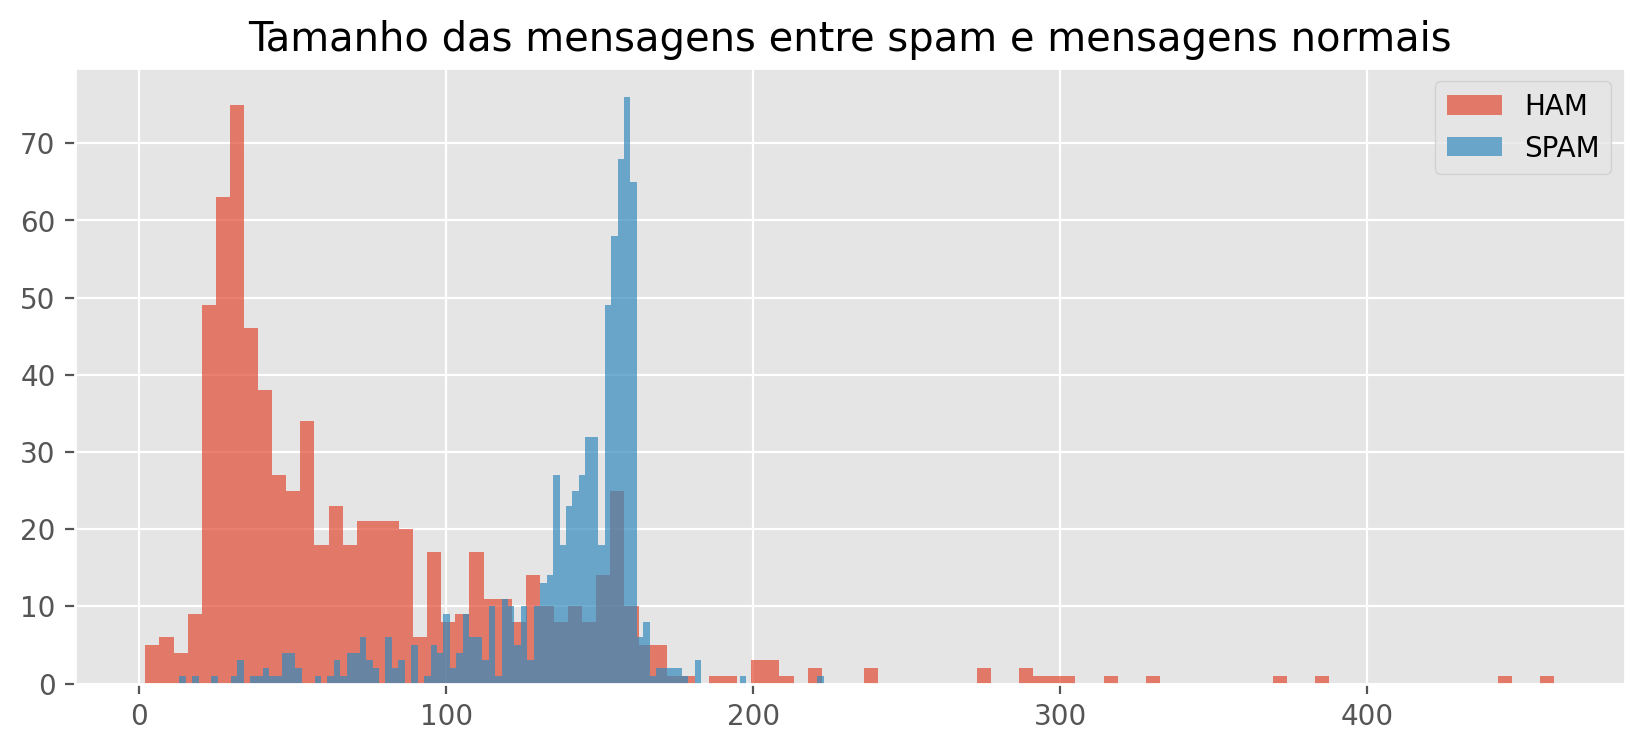

In [21]:
plt.hist(ham['length'], bins=100, alpha=0.7, label='HAM')
plt.hist(spam['length'], bins=100, alpha=0.7, label='SPAM')
plt.title('Tamanho das mensagens entre spam e mensagens normais')
plt.legend()
plt.show()

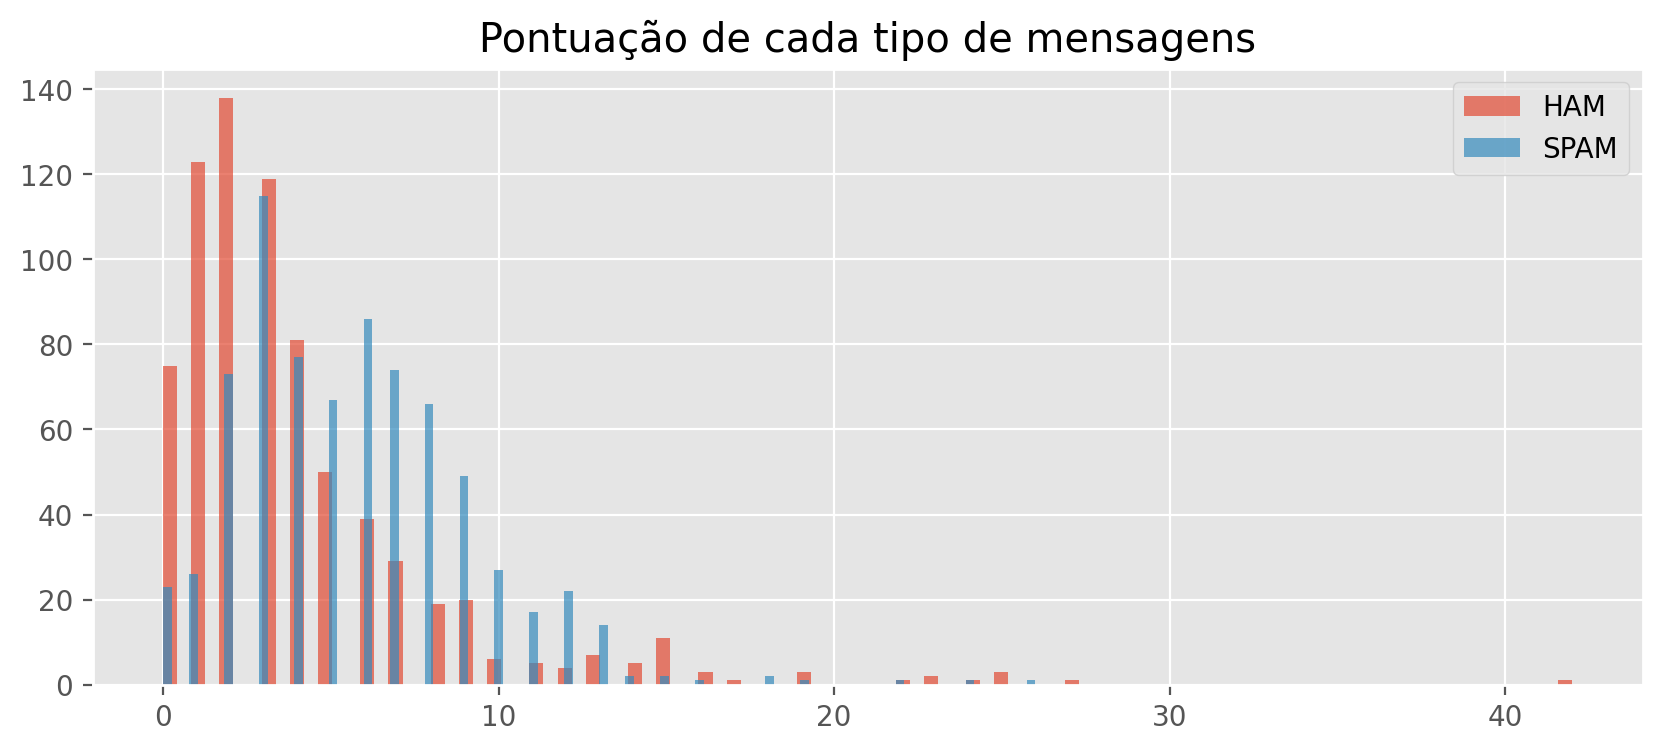

In [22]:
plt.hist(ham['punct'], bins=100, alpha=0.7, label='HAM')
plt.hist(spam['punct'], bins=100, alpha=0.7, label='SPAM')
plt.title('Pontuação de cada tipo de mensagens')
plt.legend()
plt.show()

### Preparando para treino

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=0, shuffle=True, stratify=data['label'])

X_train.shape, X_test.shape

((1195,), (299,))

In [25]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('rfc', RandomForestClassifier(n_estimators=100, n_jobs=-1))])

clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [26]:
y_pred = clf.predict(X_test)

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.96       150
        spam       1.00      0.91      0.95       149

    accuracy                           0.95       299
   macro avg       0.96      0.95      0.95       299
weighted avg       0.96      0.95      0.95       299


In [29]:
clf.classes_

array(['ham', 'spam'], dtype=object)

In [30]:
import pickle

pickle.dump(clf, open('model.pkl', 'wb'))